In [2]:
import numpy as np
import pandas as pd
import datetime
from pandas import Series,DataFrame

In [4]:
#Parsing time series information from various sources and formats 统一格式
dti = pd.to_datetime(['1/1/2018', np.datetime64('2018-01-01'),datetime.datetime(2018, 1, 1)])
dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [5]:
#Generate sequences of fixed-frequency dates and time spans
dti_1= pd.date_range('2018-01-01', periods=3, freq='H')
dti_1

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [6]:
#Manipulating and converting date times with timezone information
dti_2= dti.tz_localize('UTC')
dti_2

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:00:00+00:00',
               '2018-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [10]:
#转换时区
dti_2=dti_2.tz_convert('Asia/Shanghai')
dti_2

DatetimeIndex(['2018-01-01 08:00:00+08:00', '2018-01-01 08:00:00+08:00',
               '2018-01-01 08:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [11]:
#Resampling or converting a time series to a particular frequency
idx = pd.date_range('2018-01-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [13]:
ts.resample('2H').mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [14]:
#Performing date and time arithmetic with absolute or relative time increments
a=pd.Timestamp('2018-01-05')
a.day_name()

'Friday'

In [16]:
#add a day
b=a+pd.Timedelta('1 day')
b.day_name()

'Saturday'

In [17]:
#add a business day
c=a+pd.offsets.BDay()
c.day_name()

'Monday'

## Example

In [2]:
ufo=pd.read_csv('D:/tmp/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [6]:
ufo.Time.str.slice(-5,-3).astype(int).head()  #slice 切片法截取时间

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [7]:
ufo['Time']=pd.to_datetime(ufo.Time)

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [9]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [15]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [13]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [18]:
ts=pd.to_datetime('1/1/1999')

In [20]:
ufo.loc[ufo.Time>ts,:].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [21]:
ufo.Time.max()-ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [22]:
%matplotlib inline

In [23]:
ufo['Year']=ufo.Time.dt.year

In [24]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [25]:
ufo.Year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
1996     851
1994     406
1978     326
1975     312
1993     292
1976     281
1974     261
1977     258
1989     247
1992     245
1980     244
1990     237
1979     237
1988     232
1973     227
1991     220
1968     218
1985     211
1987     210
1966     203
1967     196
1965     195
1986     186
1982     186
1984     177
        ... 
1957      78
1962      72
1960      67
1959      57
1954      55
1958      53
1952      52
1961      50
1956      46
1947      41
1953      36
1955      33
1950      31
1951      21
1949      19
1945       9
1948       9
1944       8
1946       8
1943       5
1939       3
1942       3
1931       2
1930       2
1937       2
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

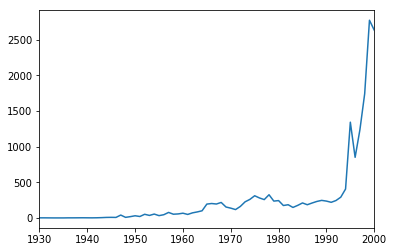

In [27]:
ufo.Year.value_counts().sort_index().plot()